In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
all_dataset = pd.read_csv("data/arrhythmia.data", header=None)

In [3]:
chosen_column = [0] + [i for i in range(3, 15)] + [all_dataset.columns[-1]]
#chosen_column = [0] + [i for i in range(3, 13)] + [14] + [all_dataset.columns[-1]]
max_trash = 20

In [5]:
def clean_data(data):
    for col in data.columns:
        trash_row = (data[col] == "?")
        good_row = (data[col] != "?")
        if sum(trash_row) < max_trash:
            data = data[good_row]
        else:
            aver =  pd.to_numeric(data[good_row][col]).mean()
            data.loc[trash_row, col] = aver
        data[col] = pd.to_numeric(data[col])
        data[col] -= data[col].min()
    return data

In [6]:
def split_train_test(df):
    margin = int(0.8 * len(df))
    df = df.sample(frac=1)
    train = df.iloc[:margin]
    test = df.iloc[margin:]
    return train, test

In [7]:
def from_data_to_xy(data):
    x = np.array(data[data.columns[:-1]], dtype=float)
    y = np.array(data[data.columns[-1]], dtype=float)
    return x, y

In [8]:
dataset = all_dataset[chosen_column]
clean_dataset = clean_data(dataset)

/home/asta/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
def check_accuracy(data, classifier, num_iter=100, d_to_xy=from_data_to_xy):
#def check_accuracy(data, classifier, num_iter=1000, d_to_xy=from_data_to_xy):
    accuracy = []
    for i in range(num_iter):
        train_data, test_data = split_train_test(data)
        train_x, train_y = d_to_xy(train_data)
        test_x, test_y = d_to_xy(test_data)
        clf = classifier.fit(train_x, train_y)
        accuracy.append(sum(clf.predict(test_x) == test_y)  / test_y.shape[0])
    return accuracy

In [18]:
clf = tree.DecisionTreeClassifier()
ac = check_accuracy(clean_dataset, clf)
print(np.mean(ac))

0.5238202247191012


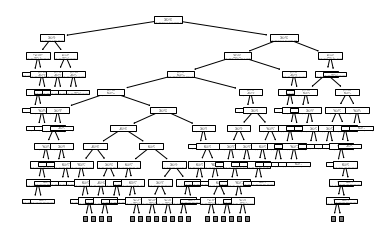

In [27]:
train_data, test_data = split_train_test(clean_dataset)
train_x, train_y = from_data_to_xy(train_data)
test_x, test_y = from_data_to_xy(test_data)
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(train_x, train_y)
tree_plot = tree.plot_tree(clf_fit, max_depth=10) 

In [33]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1e-3,
    max_depth=10, random_state=10)
ac = check_accuracy(clean_dataset, clf, num_iter=10)
print(np.mean(ac))

0.552808988764045


In [30]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=10)
ac = check_accuracy(clean_dataset, clf, num_iter=10)
print(np.mean(ac))

0.5617977528089888


In [ ]:
#1. Вирішуюче дерево
2. Бустінг 
3. Випадковий ліс

Оберіть два найбільш значущих регресори (будь-яким методом) та намалюйте області класифікації в R^2.

Для кожного методу проведіть підбір параметрів для потреби (для цього можна скористатися модулем sklearn.model_selection.GridSearchCV).
